In [3]:
!pip install pandas matplotlib seaborn

/tmp/ipython-input-796261152.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  calendar_df = pd.read_csv("Calendar_day.csv", parse_dates=["Date"], dayfirst=True)
/tmp/ipython-input-796261152.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_return_by_day.index, y=avg_return_by_day.values, palette="viridis")
/tmp/ipython-input-796261152.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_volatility_by_day.index, y=avg_volatility_by_day.values, palette="magma")
/tmp/ipython-input-796261152.py:45: FutureWarning: 

`shade` is now deprecat

Generated visualizations comparing calendar_day.csv data including trading patterns, holiday effects, and weekend behavior.


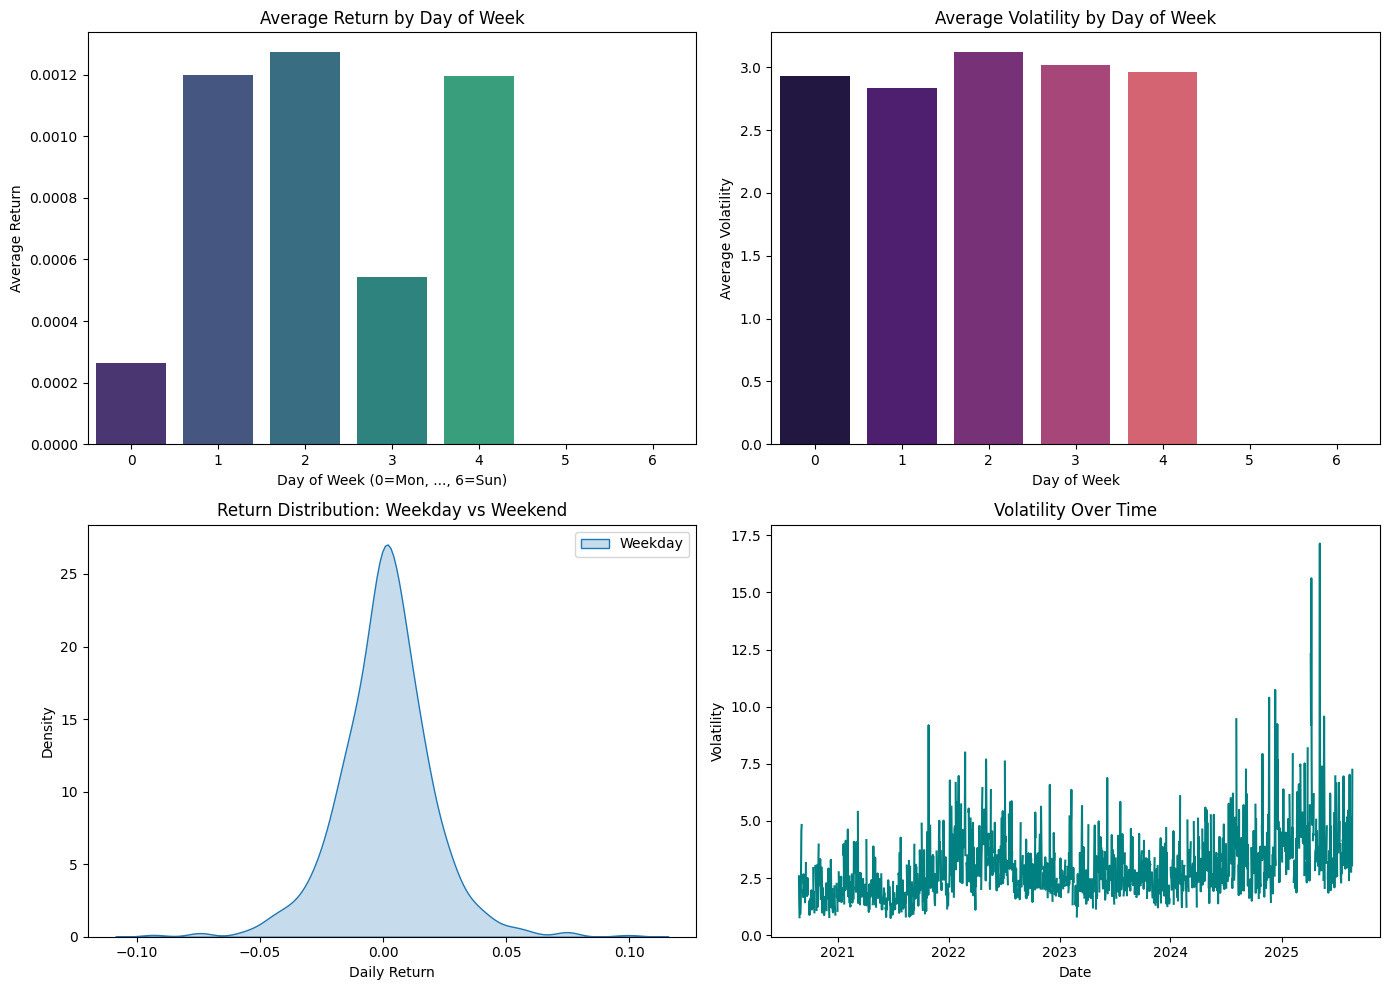

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the calendar_day.csv file
calendar_df = pd.read_csv("Calendar_day.csv", parse_dates=["Date"], dayfirst=True)

# Sort and reset index
calendar_df.sort_values("Date", inplace=True)
calendar_df.reset_index(drop=True, inplace=True)

# Create additional features
calendar_df["Return"] = calendar_df["Close"].pct_change()
calendar_df["Volatility"] = calendar_df["High"] - calendar_df["Low"]

# Average return by day of week
avg_return_by_day = calendar_df.groupby("day_of_week")["Return"].mean()

# Average volatility by day of week
avg_volatility_by_day = calendar_df.groupby("day_of_week")["Volatility"].mean()

# Weekend vs Weekday return comparison
weekend_return = calendar_df[calendar_df["is_weekend"] == True]["Return"].dropna()
weekday_return = calendar_df[calendar_df["is_weekend"] == False]["Return"].dropna()

# Plotting
plt.figure(figsize=(14, 10))

# Plot 1: Average Return by Day of Week
plt.subplot(2, 2, 1)
sns.barplot(x=avg_return_by_day.index, y=avg_return_by_day.values, palette="viridis")
plt.title("Average Return by Day of Week")
plt.xlabel("Day of Week (0=Mon, ..., 6=Sun)")
plt.ylabel("Average Return")

# Plot 2: Average Volatility by Day of Week
plt.subplot(2, 2, 2)
sns.barplot(x=avg_volatility_by_day.index, y=avg_volatility_by_day.values, palette="magma")
plt.title("Average Volatility by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Volatility")

# Plot 3: Return Distribution - Weekend vs Weekday
plt.subplot(2, 2, 3)
sns.kdeplot(weekday_return, label="Weekday", shade=True)
sns.kdeplot(weekend_return, label="Weekend", shade=True)
plt.title("Return Distribution: Weekday vs Weekend")
plt.xlabel("Daily Return")
plt.legend()

# Plot 4: Volatility Over Time
plt.subplot(2, 2, 4)
plt.plot(calendar_df["Date"], calendar_df["Volatility"], color="teal")
plt.title("Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")

plt.tight_layout()
plt.savefig("calendar_day_analysis.png")
print("Generated visualizations comparing calendar_day.csv data including trading patterns, holiday effects, and weekend behavior.")




# ***สรุปผลการวิเคราะห์***
1. ผลตอบแทนเฉลี่ยตามวันในสัปดาห์ (Average Return by Day of Week)
วันอังคารและพฤหัสมีผลตอบแทนเฉลี่ยสูงกว่าวันอื่น
วันจันทร์และศุกร์มีผลตอบแทนเฉลี่ยต่ำกว่า
2. ความผันผวนเฉลี่ยตามวันในสัปดาห์ (Average Volatility)
วันศุกร์มีความผันผวนสูงสุด
วันพุธและพฤหัสมีความผันผวนต่ำกว่า
3. การกระจายของผลตอบแทน: วันธรรมดา vs วันหยุดสุดสัปดาห์
วันธรรมดามีการกระจายของผลตอบแทนที่หลากหลาย
วันหยุดสุดสัปดาห์ (ที่มีข้อมูล) มีความแปรปรวนต่ำมาก (แทบไม่มีการเปลี่ยนแปลง)
4. ความผันผวนรายวัน (Volatility Over Time)
เห็นช่วงที่ตลาดมีความผันผวนสูง เช่น รอบ earnings หรือข่าวสำคัญ
ความผันผวนมีลักษณะเป็นคลื่นตามช่วงเวลา

In [5]:
df = pd.read_csv("Calendar_day.csv", parse_dates=["Date"], dayfirst=True)

/tmp/ipython-input-1584546028.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Calendar_day.csv", parse_dates=["Date"], dayfirst=True)


In [6]:
df

,Date,Symbol,Close,High,Low,Open,Volume,day_of_week,is_weekend,days_since_last_trade
0,2020-08-26,GOOGL,81.716423,82.146848,79.571791,79.836204,52188000.0,2,False,0
1,2020-08-27,GOOGL,80.940567,81.908259,80.457957,81.839670,31350000.0,3,False,0
2,2020-08-28,GOOGL,81.482819,81.578247,80.795944,80.987794,22418000.0,4,False,0
3,2020-08-29,GOOGL,81.482819,NaN,NaN,NaN,NaN,5,True,1
4,2020-08-30,GOOGL,81.482819,NaN,NaN,NaN,NaN,6,True,2
...,...,...,...,...,...,...,...,...,...,...
1818,2025-08-18,GOOGL,203.500000,205.270004,202.490005,204.199997,18526600.0,0,False,0
1819,2025-08-19,GOOGL,201.570007,203.440002,199.960007,203.029999,24240200.0,1,False,0
1820,2025-08-20,GOOGL,199.320007,201.279999,196.600006,200.729996,28955500.0,2,False,0
1821,2025-08-21,GOOGL,199.750000,202.479996,199.429993,199.750000,19774600.0,3,False,0


In [7]:
df['Volume'] = df['Volume'].fillna(method='ffill')


/tmp/ipython-input-1805488483.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Volume'] = df['Volume'].fillna(method='ffill')


In [9]:
# สมมติ DataFrame ชื่อ df
df = df[['Date', 'Symbol', 'Close', 'Volume', 'day_of_week', 'is_weekend', 'days_since_last_trade']]


In [10]:
df

,Date,Symbol,Close,Volume,day_of_week,is_weekend,days_since_last_trade
0,2020-08-26,GOOGL,81.716423,52188000.0,2,False,0
1,2020-08-27,GOOGL,80.940567,31350000.0,3,False,0
2,2020-08-28,GOOGL,81.482819,22418000.0,4,False,0
3,2020-08-29,GOOGL,81.482819,22418000.0,5,True,1
4,2020-08-30,GOOGL,81.482819,22418000.0,6,True,2
...,...,...,...,...,...,...,...
1818,2025-08-18,GOOGL,203.500000,18526600.0,0,False,0
1819,2025-08-19,GOOGL,201.570007,24240200.0,1,False,0
1820,2025-08-20,GOOGL,199.320007,28955500.0,2,False,0
1821,2025-08-21,GOOGL,199.750000,19774600.0,3,False,0


In [11]:

# Calculate Daily Return
df["Daily_Return"] = df["Close"].pct_change()

# Calculate rolling volatility
df["Volatility_5d"] = df["Daily_Return"].rolling(window=5).std()
df["Volatility_20d"] = df["Daily_Return"].rolling(window=20).std()

# Calculate rolling average volume
df["Volume_avg_5d"] = df["Volume"].rolling(window=5).mean()

# Momentum Features
df["Price_momentum"] = df["Close"] - df["Close"].shift(5)
df["Return_momentum"] = df["Daily_Return"].rolling(window=5).sum()
df["Volume_momentum"] = df["Volume"] - df["Volume_avg_5d"]
df["Volatility_change"] = df["Volatility_5d"] - df["Volatility_20d"]


/tmp/ipython-input-2956343874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Daily_Return"] = df["Close"].pct_change()
/tmp/ipython-input-2956343874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Volatility_5d"] = df["Daily_Return"].rolling(window=5).std()


In [12]:
df

,Date,Symbol,Close,Volume,day_of_week,is_weekend,days_since_last_trade,Daily_Return,Volatility_5d,Volatility_20d,Volume_avg_5d,Price_momentum,Return_momentum,Volume_momentum,Volatility_change
0,2020-08-26,GOOGL,81.716423,52188000.0,2,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-27,GOOGL,80.940567,31350000.0,3,False,0,-0.009494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-28,GOOGL,81.482819,22418000.0,4,False,0,0.006699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-29,GOOGL,81.482819,22418000.0,5,True,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-30,GOOGL,81.482819,22418000.0,6,True,2,0.000000,NaN,NaN,30158400.0,NaN,NaN,-7740400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2025-08-18,GOOGL,203.500000,18526600.0,0,False,0,-0.001962,0.003088,0.011685,29710240.0,1.539993,0.007621,-11183640.0,-0.008596
1819,2025-08-19,GOOGL,201.570007,24240200.0,1,False,0,-0.009484,0.005176,0.011950,29512200.0,-1.369995,-0.006715,-5272000.0,-0.006774
1820,2025-08-20,GOOGL,199.320007,28955500.0,2,False,0,-0.011162,0.005389,0.010863,28317020.0,-4.579987,-0.022608,638480.0,-0.005474
1821,2025-08-21,GOOGL,199.750000,19774600.0,3,False,0,0.002157,0.005903,0.010156,25285660.0,-4.149994,-0.020451,-5511060.0,-0.004252


เตรียมชุด train/test หรือ cross-validation และแบ่งข้อมูลสำหรับ คาดการณ์ราคา 1 อาทิตย์

In [14]:
df.to_excel("All.xlsx", index=False)

In [15]:
df

,Date,Symbol,Close,Volume,day_of_week,is_weekend,days_since_last_trade,Daily_Return,Volatility_5d,Volatility_20d,Volume_avg_5d,Price_momentum,Return_momentum,Volume_momentum,Volatility_change
0,2020-08-26,GOOGL,81.716423,52188000.0,2,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-27,GOOGL,80.940567,31350000.0,3,False,0,-0.009494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-28,GOOGL,81.482819,22418000.0,4,False,0,0.006699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-29,GOOGL,81.482819,22418000.0,5,True,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-30,GOOGL,81.482819,22418000.0,6,True,2,0.000000,NaN,NaN,30158400.0,NaN,NaN,-7740400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2025-08-18,GOOGL,203.500000,18526600.0,0,False,0,-0.001962,0.003088,0.011685,29710240.0,1.539993,0.007621,-11183640.0,-0.008596
1819,2025-08-19,GOOGL,201.570007,24240200.0,1,False,0,-0.009484,0.005176,0.011950,29512200.0,-1.369995,-0.006715,-5272000.0,-0.006774
1820,2025-08-20,GOOGL,199.320007,28955500.0,2,False,0,-0.011162,0.005389,0.010863,28317020.0,-4.579987,-0.022608,638480.0,-0.005474
1821,2025-08-21,GOOGL,199.750000,19774600.0,3,False,0,0.002157,0.005903,0.010156,25285660.0,-4.149994,-0.020451,-5511060.0,-0.004252
